In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [4]:
data = pd.read_csv("Mall_Customers.csv")

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory Data Analysis

### How many rows/columns are there?

In [6]:
data.shape

(200, 5)

### How many customers are there?

In [7]:
data['CustomerID'].nunique()

200

This means, we have 200 unique customer IDs

### How many of each gender type are there?

In [8]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

This means, there are more female than male in our dataset.

### How does the annual income distribution of our customers look like?

Descriptive Statistics

In [9]:
data['Annual Income (k$)'].describe(np.arange(0.1, 1, 0.1))

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
10%       23.900000
20%       37.800000
30%       46.000000
40%       54.000000
50%       61.500000
60%       67.000000
70%       74.300000
80%       78.200000
90%       93.400000
max      137.000000
Name: Annual Income (k$), dtype: float64

The annual income ranges from 15 to 137 with an average (median) annual income is 61 k$.

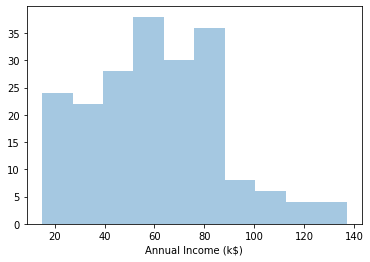

In [10]:
sns.distplot(data['Annual Income (k$)'], kde=False)

### How does the spending score distribution look like?

In [11]:
data['Spending Score (1-100)'].describe(np.arange(0.1, 1, 0.1))

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
10%       13.000000
20%       26.000000
30%       40.000000
40%       45.600000
50%       50.000000
60%       55.000000
70%       61.600000
80%       75.000000
90%       87.100000
max       99.000000
Name: Spending Score (1-100), dtype: float64

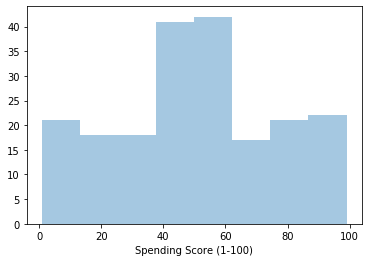

In [12]:
sns.distplot(data['Spending Score (1-100)'], kde=False)

Spend score is pretty much normally distributed.

In [13]:
new_data = pd.get_dummies(data['Gender'])

In [14]:
new_data.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [15]:
data = pd.concat([data,new_data],axis=1,sort=False)

In [16]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0


# Clustering

In [17]:
# from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [41]:
# Get features we need
features = ['Annual Income (k$)', 'Spending Score (1-100)','Age']
X = data[features]


### note: at first I tried features = ['Annual Income (k$)', 'Spending Score (1-100)','Female','Male']
### but I just decided to go with age as 3rd feature because Male and Female stop at Cluster 1 
### Idk what I did wrong or if it's wrong at all haha

# Convert categorical to numeric
# X = pd.get_dummies(X_raw)
# X_raw.head()

X.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


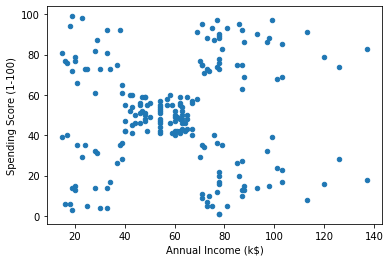

In [40]:
# If you have 2 features, you can plot it on a 2D scatter plot
X.plot.scatter('Annual Income (k$)', 'Spending Score (1-100)')

## but I have 4 features so nope

### Perform Agglomerative Clustering

In [42]:
# Clustering using AGC
agc = AgglomerativeClustering()

# Fit data to model
agc.fit(X)

# Get labels
labels = agc.labels_

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [43]:
new_data.head()

,Annual Income (k$),Spending Score (1-100),Age,labels
0,15,39,19,1
1,15,81,21,1
2,16,6,20,1
3,16,77,23,1
4,17,40,31,1


In [44]:
# How many labels were created
new_data.labels.value_counts()

1    126
0     74
Name: labels, dtype: int64

# Plot Dendogram (Optional)
Plot this only if you have few data points.

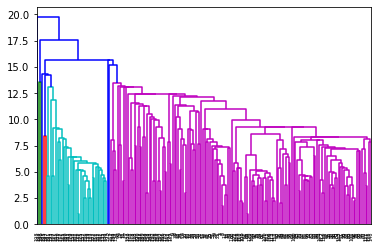

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Get Linkages
Z = linkage(X)

# Plot Dendogram
dendrogram(Z);  

In [46]:
X.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


### Plot Points in Clusters

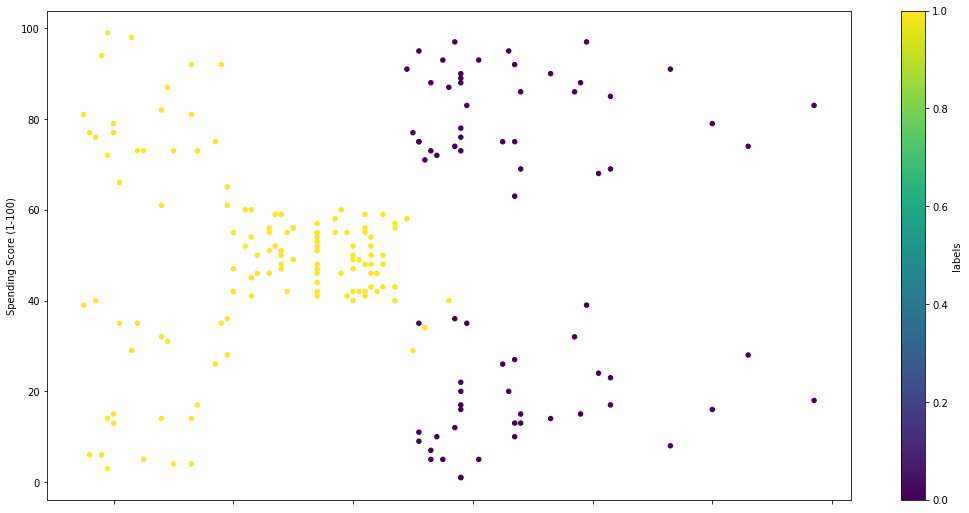

In [56]:
# Plot data points and colorize based on label
new_data.plot.scatter(x='Annual Income (k$)', 
                      y='Spending Score (1-100)',
                      c='labels', 
                      cmap='viridis',
                      figsize=(18, 9))


#### QUESTION: HOW DO I ADD THE MALE AND FEMALE IN THE CODE?

# # Get cluster centers
# centers = agc.cluster_centers_
# plt.scatter(centers[:,0],centers[:,1], s=200, color='black')

# Deep Dive to each cluster

mean of annual income = 60, 
mean of spending score = 50

In [57]:
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,Annual Income (k$),Spending Score (1-100),Age,labels
count,74.000000,74.000000,74.000000,74.0
mean,87.337838,51.459459,36.945946,0.0
std,16.248310,34.009342,9.109519,0.0
min,69.000000,1.000000,19.000000,0.0
25%,77.000000,16.250000,31.000000,0.0
50%,81.000000,68.500000,35.000000,0.0
75%,97.000000,84.500000,41.750000,0.0
max,137.000000,97.000000,59.000000,0.0


Cluster 0: High Income, High Spend titas and titos

In [58]:
# Cluster 1 
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,Annual Income (k$),Spending Score (1-100),Age,labels
count,126.000000,126.000000,126.000000,126.0
mean,44.833333,49.460317,39.968254,1.0
std,16.438856,19.612914,16.086733,0.0
min,15.000000,3.000000,18.000000,1.0
25%,30.750000,41.250000,24.250000,1.0
50%,47.000000,49.500000,38.000000,1.0
75%,60.000000,58.000000,51.000000,1.0
max,76.000000,99.000000,70.000000,1.0


Cluster 1: Low Income, Mid Spend titas and titos

In [59]:
# Cluster 2 
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,Annual Income (k$),Spending Score (1-100),Age,labels
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [38]:
# Cluster 3
cluster_3 = new_data[new_data['labels']==3]
cluster_3.describe()

,Annual Income (k$),Spending Score (1-100),Female,Male,labels
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


I stopped already coz everything is NaN

Cluster 4: High Income & High Spend

# Exercises: 
- Add more features to X and see the results of the clusters.
- Add more clusters and see how the clusters look like.
But how do I add more clusters? I thought Agglomerative doesn't need us to input a number of clusters?

# Explore [DBSCAN](https://colab.research.google.com/drive/1a0kJn8G8SsXKjzIAiiCq0HOfFn38B12r)